In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from Helpers.eda import* 
from Helpers.data_prep import*

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")

# VERİSETİ KEŞFİ

Veri seti hikayesi

Titanik, Güney Atlantik Okyanusunda 15 Nisan 1912 sabahın erken saatlerinde, Southampton'dan New York'a yaptığı yolculuk sırasında bir buzdağıyla çarpışarak battı.

Passenger ID : Her bir yolcu için ayrı değer taşıyan ve Int64(Tamsayı) değerinde olan bir değişken.

Survıved : Ilgılı yolcunun hayatta kalıp kalmadığını gösterir. Float64 tipindedir.(Hayatta kalma 0 = Hayır, 1 = Evet)

Pclass : Tamsayı değerli bir değişkendir ve yolcunun bilet sınıfını gösterir.

Name: Kategorik bir değişkendir. Yolcunun ismini gösterir.

Sex : Başka bir kategorik değişkendir. Yolcunun cinsiyetini gösterir.

Age : Float64 tipindeki değişken yolcunun yaşını gösterir.

Sibsp : İnt64 tipindeki değişken gemideki yolcunun kardeş ve eş sayısını gösterir.

Parch : İnt64 tipindedir ve yolcunun çocuk sayısını, ebeveyn sayısını gösterir.

Ticket : Kategorik değişken olak ticket değişkeni yolcunun bilet kodunu gösterir.

Fare : Tamsayı değerindeki fare değişkeni yolcunun bilete ödediği miktarı belirtir.

Cabin : Kategorik değişken olan cabin değişkeni yolcunun kabin numarasını gösterir.

Embarked: Son değişkenimiz olan embarked değişkeni kategorik bir değişken olup yolcunun gemiye binmiş olduğu liman bilgisini taşır. C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

count    mean     std   min     25%     50%     75%     max
PassengerId 891.000 446.000 257.354 1.000 223.500 446.000 668.500 891.000
Survived    891.000   0.384   0.487 0.000   0.000   0.000   1.000   1.000
Pclass      891.000   2.309   0.836 1.000   2.000   3.000   3.000   3.000
Age         714.000  29.699  14.526 0.420  20.125  28.000  38.000  80.000
SibSp       891.000   0.523   1.103 0.000   0.000   0.000   1.000   8.000
Parch       891.000   0.382   0.806 0.000   0.000   0.000   0.000   6.000
Fare        891.000  32.204  49.693 0.000   7.910  14.454  31.000 512.329

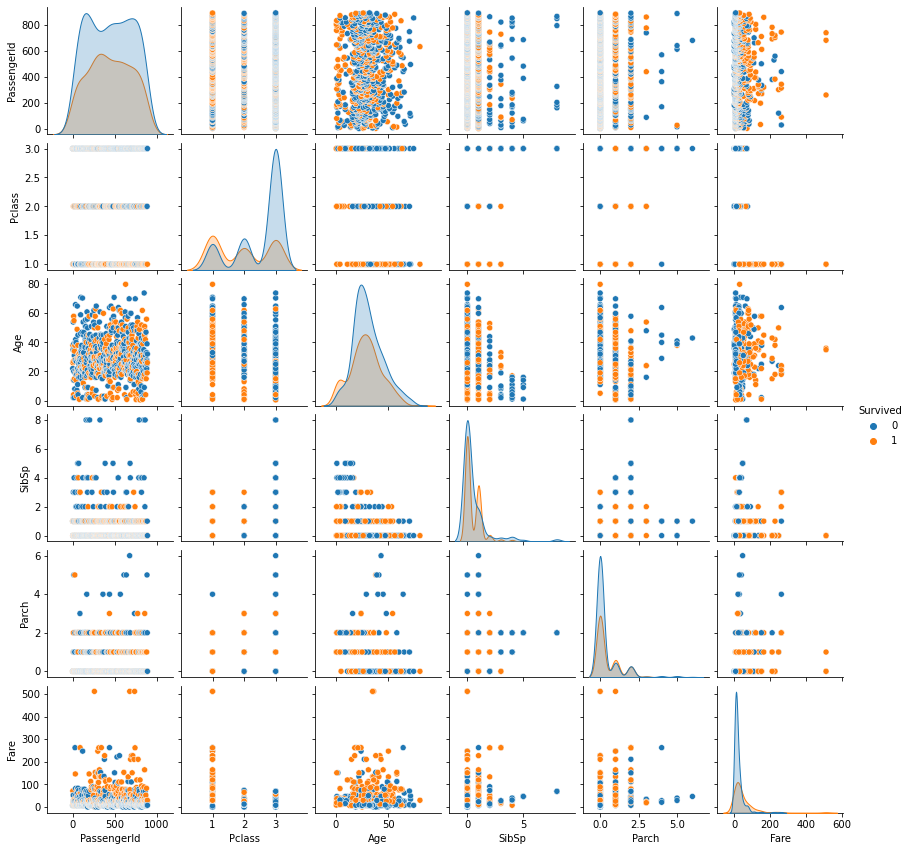

In [6]:
sns.pairplot(df.drop([], axis = 1), 
             hue='Survived', height=2)

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
check_df(df, head=5)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 

In [10]:
# Kategorik ve nümerik verilerin seçimi
grab_col_names(df, cat_th=10, car_th=20)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


(['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch'],
 ['PassengerId', 'Age', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [11]:
cat_cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

In [12]:
num_cols= [ 'Age', 'Fare']

In [13]:
target_summary_with_cat(df, 'Survived', cat_cols)

                                    TARGET_MEAN
Sex    Embarked Pclass SibSp Parch             
female C        1      0     0            0.944
                             1            1.000
                             2            1.000
                       1     0            1.000
                             1            1.000
...                                         ...
male   S        3      3     2            0.000
                       4     1            0.000
                             2            0.333
                       5     2            0.000
                       8     2            0.000

[117 rows x 1 columns]




In [14]:
target_summary_with_num(df, 'Survived', 'Fare')

           Fare
Survived       
0        22.118
1        48.395




In [15]:
target_summary_with_num(df, 'Survived', 'Age')

            Age
Survived       
0        30.626
1        28.344




In [16]:
df.sort_values('Fare', axis = 0, ascending = False)

PassengerId  Survived  Pclass                                Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
258          259         1       1                    Ward, Miss. Anna  female 35.000      0      0  PC 17755 512.329          NaN        C
737          738         1       1              Lesurer, Mr. Gustave J    male 35.000      0      0  PC 17755 512.329         B101        C
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez    male 36.000      0      1  PC 17755 512.329  B51 B53 B55        C
88            89         1       1          Fortune, Miss. Mabel Helen  female 23.000      3      2     19950 263.000  C23 C25 C27        S
27            28         0       1      Fortune, Mr. Charles Alexander    male 19.000      3      2     19950 263.000  C23 C25 C27        S
..           ...       ...     ...                                 ...     ...    ...    ...    ...       ...     ...          ...      ...
633          634         0       1       Parr, Mr. William Henry Marsh    male    NaN      0      0    112052   0.000          NaN        S
413          414         0       2      Cunningham, Mr. Alfred Fleming    male    NaN      0      0    239853   0.000          NaN        S
822          823         0       1     Reuchlin, Jonkheer. John George    male 38.000      0      0     19972   0.000          NaN        S
732          733         0       2                Knight, Mr. Robert J    male    NaN      0      0    239855   0.000          NaN        S
674          675         0       2          Watson, Mr. Ennis Hastings    male    NaN      0      0    239856   0.000          NaN        S

[891 rows x 12 columns]

In [17]:
#query() fonksiyonu ile filtreleme ve yaşayanlara göre sıralama -  ödenen ücrete göre sıralanarak
df_pop = df.query('Survived==1')
df_pop
df_pop.sort_values('Fare', axis = 0, ascending = False)

PassengerId  Survived  Pclass                                Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
258          259         1       1                    Ward, Miss. Anna  female 35.000      0      0  PC 17755 512.329          NaN        C
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez    male 36.000      0      1  PC 17755 512.329  B51 B53 B55        C
737          738         1       1              Lesurer, Mr. Gustave J    male 35.000      0      0  PC 17755 512.329         B101        C
341          342         1       1      Fortune, Miss. Alice Elizabeth  female 24.000      3      2     19950 263.000  C23 C25 C27        S
88            89         1       1          Fortune, Miss. Mabel Helen  female 23.000      3      2     19950 263.000  C23 C25 C27        S
..           ...       ...     ...                                 ...     ...    ...    ...    ...       ...     ...          ...      ...
875          876         1       3    Najib, Miss. Adele Kiamie "Jane"  female 15.000      0      0      2667   7.225          NaN        C
553          554         1       3   Leeni, Mr. Fahim ("Philip Zenni")    male 22.000      0      0      2620   7.225          NaN        C
127          128         1       3           Madsen, Mr. Fridtjof Arne    male 24.000      0      0   C 17369   7.142          NaN        S
804          805         1       3             Hedman, Mr. Oskar Arvid    male 27.000      0      0    347089   6.975          NaN        S
271          272         1       3        Tornquist, Mr. William Henry    male 25.000      0      0      LINE   0.000          NaN        S

[342 rows x 12 columns]

In [18]:
#query() fonksiyonu ile filtreleme ve yaşayanlara göre sıralama - ödenen ücrete göre sıralanarak
df_pop = df.query('Survived==0')
df_pop
df_pop.sort_values('Fare', axis = 0, ascending = False)

PassengerId  Survived  Pclass                             Name   Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
27            28         0       1   Fortune, Mr. Charles Alexander  male 19.000      3      2     19950 263.000  C23 C25 C27        S
438          439         0       1                Fortune, Mr. Mark  male 64.000      1      4     19950 263.000  C23 C25 C27        S
118          119         0       1         Baxter, Mr. Quigg Edmond  male 24.000      0      1  PC 17558 247.521      B58 B60        C
557          558         0       1              Robbins, Mr. Victor  male    NaN      0      0  PC 17757 227.525          NaN        C
527          528         0       1               Farthing, Mr. John  male    NaN      0      0  PC 17483 221.779          C95        S
..           ...       ...     ...                              ...   ...    ...    ...    ...       ...     ...          ...      ...
179          180         0       3              Leonard, Mr. Lionel  male 36.000      0      0      LINE   0.000          NaN        S
815          816         0       1                 Fry, Mr. Richard  male    NaN      0      0    112058   0.000         B102        S
277          278         0       2      Parkes, Mr. Francis "Frank"  male    NaN      0      0    239853   0.000          NaN        S
466          467         0       2            Campbell, Mr. William  male    NaN      0      0    239853   0.000          NaN        S
302          303         0       3  Johnson, Mr. William Cahoone Jr  male 19.000      0      0      LINE   0.000          NaN        S

[549 rows x 12 columns]

In [19]:
# Unique cabin sayısı
cabins=pd.unique(df.Cabin)
print("Unique cabin sayısı: {}".format(len(cabins)))
cabins[:10]

Unique cabin sayısı: 148


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [20]:
pclass = pd.unique(df.Pclass)
print("Unique pclass sayısı: {}".format(len(pclass)))
pclass[:5]

Unique pclass sayısı: 3


array([3, 1, 2], dtype=int64)

In [21]:
def pie_visualization(dataframe,column):
    dataframe[column].value_counts().plot.pie(legend=True,autopct="%1.2f%%")

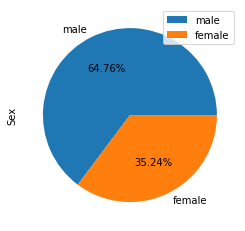

In [22]:
pie_visualization(df,"Sex")

In [23]:
# Plcass vs Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Pclass  Survived
0       1     0.630
1       2     0.473
2       3     0.242

In [24]:
# Sex vs Survived
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)


Sex  Survived
0  female     0.742
1    male     0.189

In [25]:
# Sibsp vs Survived
df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

SibSp  Survived
1      1     0.536
2      2     0.464
0      0     0.345
3      3     0.250
4      4     0.167
5      5     0.000
6      8     0.000

In [26]:
# Parch vs Survived
df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Parch  Survived
3      3     0.600
1      1     0.551
2      2     0.500
0      0     0.344
5      5     0.200
4      4     0.000
6      6     0.000

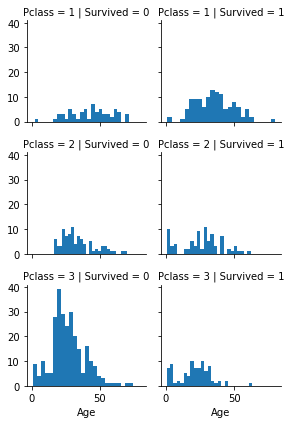

In [27]:
data = sns.FacetGrid(df, col = "Survived", row = "Pclass", size = 2)
data.map(plt.hist, "Age", bins = 25)
data.add_legend()
plt.show()

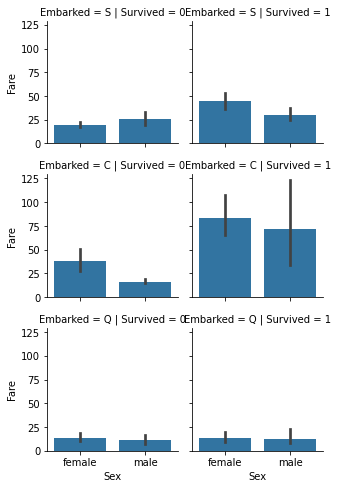

In [28]:
data = sns.FacetGrid(df, row = "Embarked", col = "Survived", size = 2.3)
data.map(sns.barplot, "Sex", "Fare")
data.add_legend()
plt.show()

In [29]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
               n= Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk Grafiği
    """
    df_ =df[degisken]
    df_sayma = df_.value_counts()
    df_sayma = df_sayma[:n]
    plt.figure()
    plt.bar(df_sayma.index, df_sayma , color= "purple")
    plt.xticks(df_sayma.index, df_sayma.index.values)
    plt.xticks(rotation=40) #yazı eğikliği 
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, df_sayma))

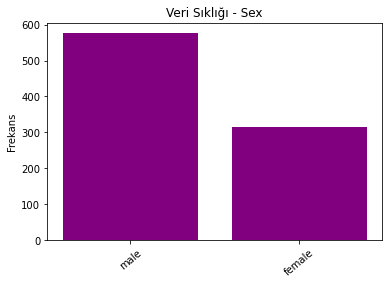

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


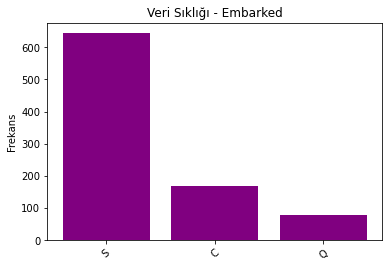

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


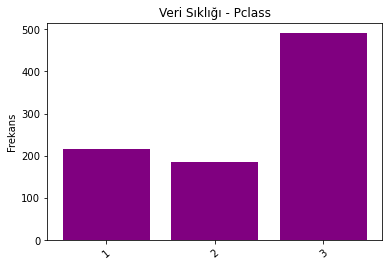

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


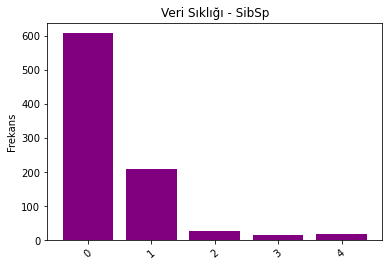

SibSp: 
 0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64


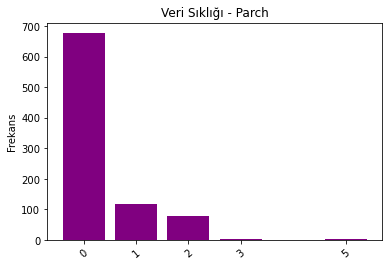

Parch: 
 0    678
1    118
2     80
5      5
3      5
Name: Parch, dtype: int64


In [30]:
for i in cat_cols:
    plotBar(i)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

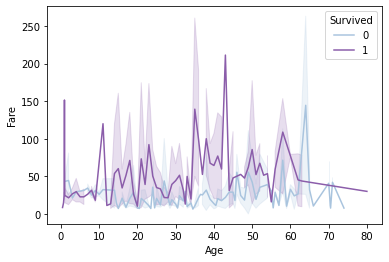

In [31]:
sns.lineplot(data=df, x="Age", y="Fare", hue="Survived", palette="BuPu")

In [32]:
def plotHistogram(degisken):
    """
        Girdi: Değisken / sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(df[degisken], bins=75, color = "pink")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

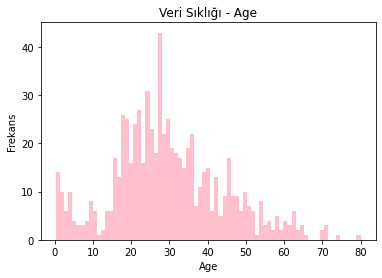

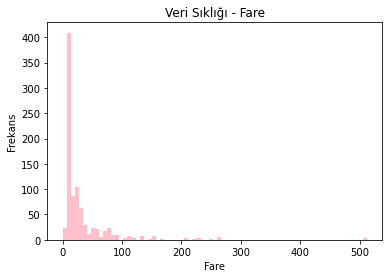

In [33]:
for i in num_cols:
    plotHistogram(i)

In [34]:
for template in ["plotly"]:
    fig = px.scatter(df,
                     x="PassengerId", y="Age", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Which Age Survived?")
    fig.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

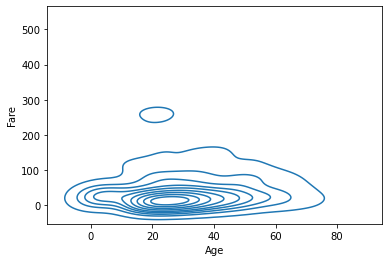

In [35]:
data = df
sns.kdeplot( data['Age'], data['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

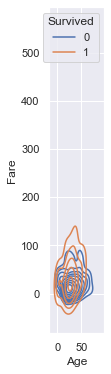

In [36]:
sns.set_theme(style="darkgrid")
data = df

# Set up the figure
f, ax = plt.subplots(figsize=(6,6))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=df,
    x="Age",
    y="Fare",
    hue="Survived",
    thresh=.1,
)


<AxesSubplot:xlabel='Age'>

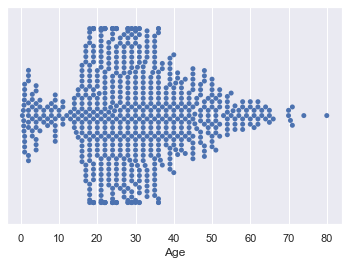

In [37]:
data = df
sns.swarmplot(x = data["Age"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

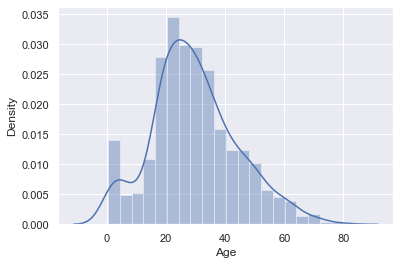

In [38]:
data = df 
sns.distplot( data['Age'])

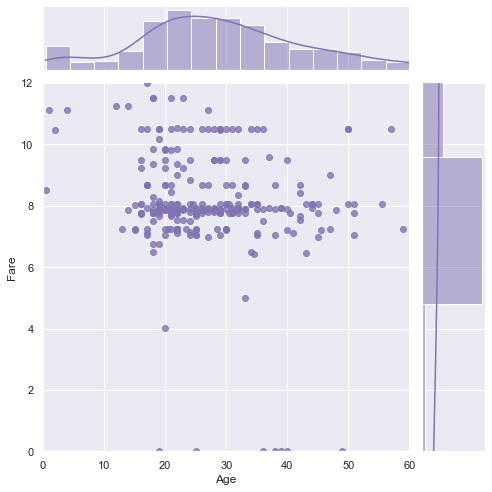

In [39]:
sns.set_theme(style="darkgrid")

data = df
g = sns.jointplot(x="Age", y="Fare", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [40]:
import plotly.express as px
fig = px.scatter(df, x="Age", y="Fare", color="Survived", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [41]:
import plotly.express as px
fig = px.scatter(df, x="Age", y="Fare", color="Sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [42]:
import plotly.express as px
fig = px.parallel_categories(df, color="Age", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

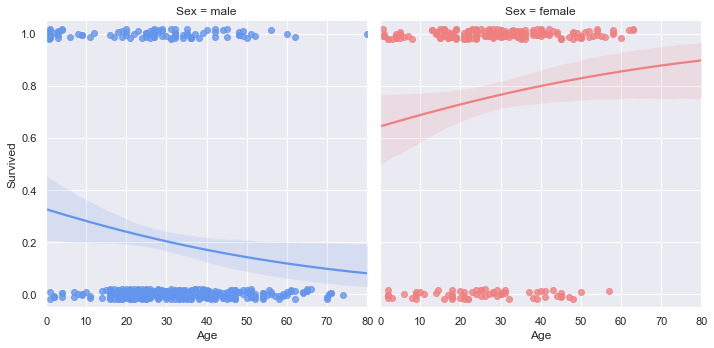

In [43]:
df = df
pal = dict(male="#6495ED", female="#F08080")

# Yaş ve cisiyet içn yaşama olasılığı kıyaslaması
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

In [44]:
fig = px.scatter_3d(df, x='PassengerId', y='Sex', z='Age',
                    color='Age')
fig.show()


# VERİSETİ TEMİZLEME

<AxesSubplot:>

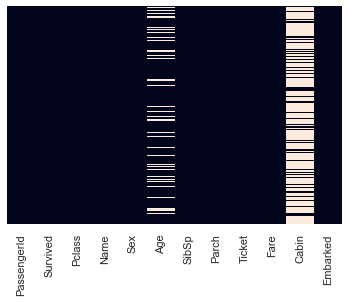

In [45]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [46]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df[df["Embarked"].isnull()]

PassengerId  Survived  Pclass                                       Name     Sex    Age  SibSp  Parch  Ticket   Fare Cabin Embarked
61            62         1       1                        Icard, Miss. Amelie  female 38.000      0      0  113572 80.000   B28      NaN
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female 62.000      0      0  113572 80.000   B28      NaN

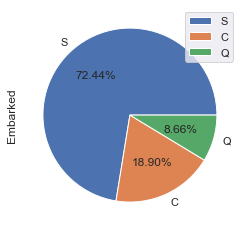

In [48]:
pie_visualization(df,"Embarked")

In [49]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [50]:
df[df["Age"].isnull()]

PassengerId  Survived  Pclass                                      Name     Sex  Age  SibSp  Parch      Ticket   Fare Cabin Embarked
5              6         0       3                          Moran, Mr. James    male  NaN      0      0      330877  8.458   NaN        Q
17            18         1       2              Williams, Mr. Charles Eugene    male  NaN      0      0      244373 13.000   NaN        S
19            20         1       3                   Masselmani, Mrs. Fatima  female  NaN      0      0        2649  7.225   NaN        C
26            27         0       3                   Emir, Mr. Farred Chehab    male  NaN      0      0        2631  7.225   NaN        C
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0      330959  7.879   NaN        Q
..           ...       ...     ...                                       ...     ...  ...    ...    ...         ...    ...   ...      ...
859          860         0       3                          Razi, Mr. Raihed    male  NaN      0      0        2629  7.229   NaN        C
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN      8      2    CA. 2343 69.550   NaN        S
868          869         0       3               van Melkebeke, Mr. Philemon    male  NaN      0      0      345777  9.500   NaN        S
878          879         0       3                        Laleff, Mr. Kristo    male  NaN      0      0      349217  7.896   NaN        S
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN      1      2  W./C. 6607 23.450   NaN        S

[177 rows x 12 columns]

In [51]:
df["Age"] = df["Age"].fillna(np.mean(df[df["Pclass"] == 3]["Age"]))

In [52]:
df[df["Age"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Cabin değişkenini eğitimde kullanmayacağım için doldurmadım, ileride silinecek

In [53]:
df.duplicated().any()

False

In [54]:
outlier_thresholds(df,"Age")

(-66.0, 126.0)

In [55]:
outlier_thresholds(df,"Fare")

(-150.056225, 269.360375)

<AxesSubplot:xlabel='Age'>

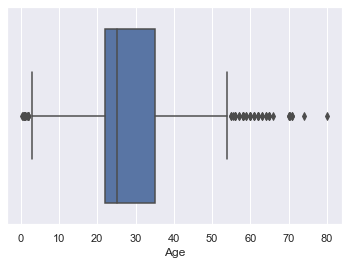

In [56]:
sns.boxplot(data=df, x="Age") 

<AxesSubplot:xlabel='Fare'>

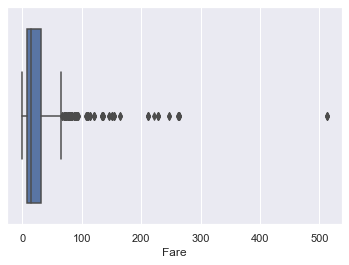

In [57]:
sns.boxplot(data=df, x="Fare") 

In [58]:
check_outlier(df,"Age") 

False

In [59]:
check_outlier(df,"Fare") 

True

In [60]:
grab_outliers(df, "Fare", index=False)

     PassengerId  Survived  Pclass                                Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
258          259         1       1                    Ward, Miss. Anna  female 35.000      0      0  PC 17755 512.329          NaN        C
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez    male 36.000      0      1  PC 17755 512.329  B51 B53 B55        C
737          738         1       1              Lesurer, Mr. Gustave J    male 35.000      0      0  PC 17755 512.329         B101        C


In [61]:
replace_with_thresholds(df, "Fare", q1=0.05, q3=0.95)

<AxesSubplot:xlabel='Fare'>

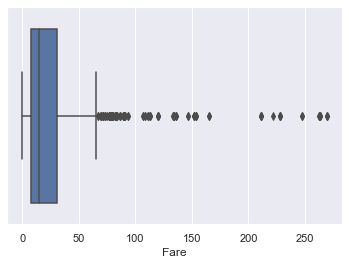

In [62]:
sns.boxplot(data=df, x="Fare") 

# FUTURE ENGINEERING

In [63]:
data=df.drop(["PassengerId"],axis=1) #axis=1 ssütun anlamında

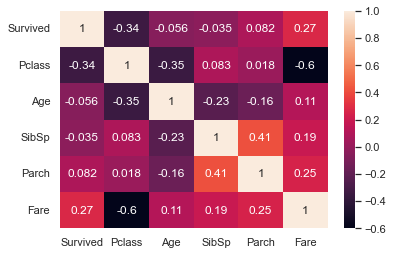

In [64]:
sns.heatmap(data.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()

İsim değişkeninden ünvanların çıkarımını yapıp isim değişkenini düşürme

In [65]:
df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [66]:
name = df["Name"]
df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [67]:
df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

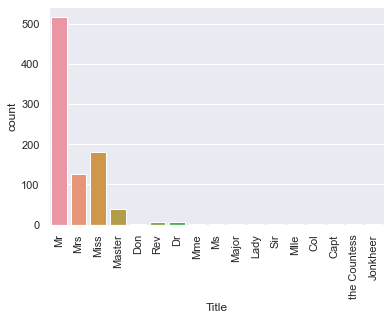

In [68]:
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 90)
plt.show()

In [69]:
# kategorik hale çevirme
df["Title"] = df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in df["Title"]]
df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

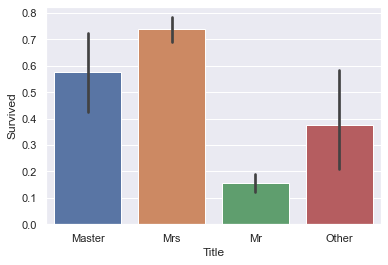

In [70]:
data = sns.barplot(x = "Title", y = "Survived", data = df)
data.set_xticklabels(["Master","Mrs","Mr","Other"])
plt.show()

In [71]:
df.drop(labels = ["Name"], axis = 1, inplace = True)

In [72]:
df.head()

PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked  Title
0            1         0       3    male 22.000      1      0         A/5 21171  7.250   NaN        S      2
1            2         1       1  female 38.000      1      0          PC 17599 71.283   C85        C      1
2            3         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S      1
3            4         1       1  female 35.000      1      0            113803 53.100  C123        S      1
4            5         0       3    male 35.000      0      0            373450  8.050   NaN        S      2

In [73]:
df = pd.get_dummies(df,columns=["Title"])
df.head()

PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked  Title_0  Title_1  Title_2  Title_3
0            1         0       3    male 22.000      1      0         A/5 21171  7.250   NaN        S        0        0        1        0
1            2         1       1  female 38.000      1      0          PC 17599 71.283   C85        C        0        1        0        0
2            3         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S        0        1        0        0
3            4         1       1  female 35.000      1      0            113803 53.100  C123        S        0        1        0        0
4            5         0       3    male 35.000      0      0            373450  8.050   NaN        S        0        0        1        0

In [74]:
df["family_size"] =df["SibSp"] + df["Parch"] + 1

In [75]:
df.head()

PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked  Title_0  Title_1  Title_2  Title_3  family_size
0            1         0       3    male 22.000      1      0         A/5 21171  7.250   NaN        S        0        0        1        0            2
1            2         1       1  female 38.000      1      0          PC 17599 71.283   C85        C        0        1        0        0            2
2            3         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S        0        1        0        0            1
3            4         1       1  female 35.000      1      0            113803 53.100  C123        S        0        1        0        0            2
4            5         0       3    male 35.000      0      0            373450  8.050   NaN        S        0        0        1        0            1

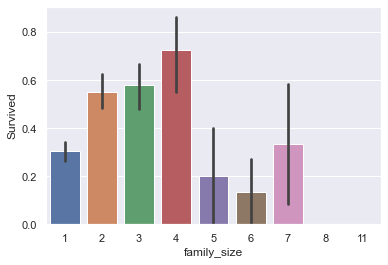

In [76]:
data = sns.barplot(x = "family_size", y = "Survived", data = df)
plt.show()

In [77]:
df["family_size"] = [1 if i < 5 else 0 for i in df["family_size"]]

In [78]:
df.head()

PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked  Title_0  Title_1  Title_2  Title_3  family_size
0            1         0       3    male 22.000      1      0         A/5 21171  7.250   NaN        S        0        0        1        0            1
1            2         1       1  female 38.000      1      0          PC 17599 71.283   C85        C        0        1        0        0            1
2            3         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S        0        1        0        0            1
3            4         1       1  female 35.000      1      0            113803 53.100  C123        S        0        1        0        0            1
4            5         0       3    male 35.000      0      0            373450  8.050   NaN        S        0        0        1        0            1

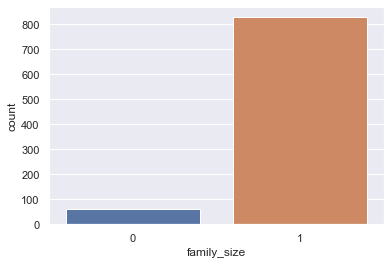

In [79]:
sns.countplot(x = "family_size", data = df)
plt.show()

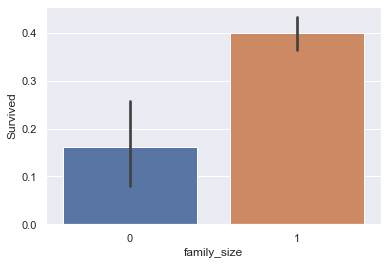

In [80]:
data = sns.barplot(x = "family_size", y = "Survived", data = df)
plt.show()

Küçük ailelerin yaşama olaılığı daha yüksek

In [81]:
df = pd.get_dummies(df, columns= ["family_size"])
df.head()

PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked  Title_0  Title_1  Title_2  Title_3  family_size_0  family_size_1
0            1         0       3    male 22.000      1      0         A/5 21171  7.250   NaN        S        0        0        1        0              0              1
1            2         1       1  female 38.000      1      0          PC 17599 71.283   C85        C        0        1        0        0              0              1
2            3         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S        0        1        0        0              0              1
3            4         1       1  female 35.000      1      0            113803 53.100  C123        S        0        1        0        0              0              1
4            5         0       3    male 35.000      0      0            373450  8.050   NaN        S        0        0        1        0              0              1

In [82]:
df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [83]:
df = pd.get_dummies(df, columns=["Embarked"])
df.head()

PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare Cabin  Title_0  Title_1  Title_2  Title_3  family_size_0  family_size_1  \
0            1         0       3    male 22.000      1      0         A/5 21171  7.250   NaN        0        0        1        0              0              1   
1            2         1       1  female 38.000      1      0          PC 17599 71.283   C85        0        1        0        0              0              1   
2            3         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        0        1        0        0              0              1   
3            4         1       1  female 35.000      1      0            113803 53.100  C123        0        1        0        0              0              1   
4            5         0       3    male 35.000      0      0            373450  8.050   NaN        0        0        1        0              0              1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

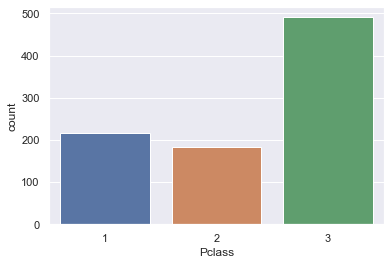

In [84]:
sns.countplot(x = "Pclass", data = df)
plt.show()

In [85]:
df["Pclass"] = df["Pclass"].astype("category")
df = pd.get_dummies(df, columns= ["Pclass"])
df.head()

PassengerId  Survived     Sex    Age  SibSp  Parch            Ticket   Fare Cabin  Title_0  Title_1  Title_2  Title_3  family_size_0  family_size_1  Embarked_C  \
0            1         0    male 22.000      1      0         A/5 21171  7.250   NaN        0        0        1        0              0              1           0   
1            2         1  female 38.000      1      0          PC 17599 71.283   C85        0        1        0        0              0              1           1   
2            3         1  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        0        1        0        0              0              1           0   
3            4         1  female 35.000      1      0            113803 53.100  C123        0        1        0        0              0              1           0   
4            5         0    male 35.000      0      0            373450  8.050   NaN        0        0        1        0              0              1           0   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           1         0         0         1  
1           0           0         1         0         0  
2           0           1         0         0         1  
3           0           1         1         0         0  
4           0           1         0         0         1

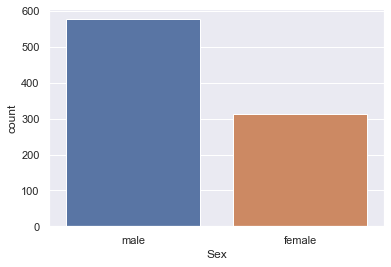

In [86]:
sns.countplot(x = "Sex", data = df)
plt.show()

In [87]:
df["Sex"] = df["Sex"].astype("category")
df = pd.get_dummies(df, columns=["Sex"])
df.head()


PassengerId  Survived    Age  SibSp  Parch            Ticket   Fare Cabin  Title_0  Title_1  Title_2  Title_3  family_size_0  family_size_1  Embarked_C  Embarked_Q  \
0            1         0 22.000      1      0         A/5 21171  7.250   NaN        0        0        1        0              0              1           0           0   
1            2         1 38.000      1      0          PC 17599 71.283   C85        0        1        0        0              0              1           1           0   
2            3         1 26.000      0      0  STON/O2. 3101282  7.925   NaN        0        1        0        0              0              1           0           0   
3            4         1 35.000      1      0            113803 53.100  C123        0        1        0        0              0              1           0           0   
4            5         0 35.000      0      0            373450  8.050   NaN        0        0        1        0              0              1           0           0   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  
0           1         0         0         1           0         1  
1           0         1         0         0           1         0  
2           1         0         0         1           1         0  
3           1         1         0         0           1         0  
4           1         0         0         1           0         1

In [88]:
df.drop(labels = ["PassengerId", "Cabin","Ticket"], axis = 1, inplace = True)

In [89]:
df.head()

Survived    Age  SibSp  Parch   Fare  Title_0  Title_1  Title_2  Title_3  family_size_0  family_size_1  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  \
0         0 22.000      1      0  7.250        0        0        1        0              0              1           0           0           1         0         0   
1         1 38.000      1      0 71.283        0        1        0        0              0              1           1           0           0         1         0   
2         1 26.000      0      0  7.925        0        1        0        0              0              1           0           0           1         0         0   
3         1 35.000      1      0 53.100        0        1        0        0              0              1           0           0           1         1         0   
4         0 35.000      0      0  8.050        0        0        1        0              0              1           0           0           1         0         0   

   Pclass_3  Sex_female  Sex_male  
0         1           0         1  
1         0           1         0  
2         1           1         0  
3         0           1         0  
4         1           0         1

# MODEL GELİŞTİRME

In [90]:
x=df.drop('Survived', axis = 1)
x.head() 

Age  SibSp  Parch   Fare  Title_0  Title_1  Title_2  Title_3  family_size_0  family_size_1  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
0 22.000      1      0  7.250        0        0        1        0              0              1           0           0           1         0         0         1   
1 38.000      1      0 71.283        0        1        0        0              0              1           1           0           0         1         0         0   
2 26.000      0      0  7.925        0        1        0        0              0              1           0           0           1         0         0         1   
3 35.000      1      0 53.100        0        1        0        0              0              1           0           0           1         1         0         0   
4 35.000      0      0  8.050        0        0        1        0              0              1           0           0           1         0         0         1   

   Sex_female  Sex_male  
0           0         1  
1           1         0  
2           1         0  
3           1         0  
4           0         1

In [91]:
y=df["Survived"]
y.head() 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [92]:
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [93]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , MinMaxScaler , StandardScaler
ss=StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [94]:
print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 623
X_test 268
y_train 623
y_test 268


In [95]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Lojistik Regresyon

In [96]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))
y_pred= logreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy: % 83.15
Testing Accuracy: % 82.84
[[145  23]
 [ 23  77]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       168
           1       0.77      0.77      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



# Random Forest

In [97]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=250,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
acc_rf_train = round(rf.score(x_train, y_train)*100,2) 
acc_rf_test = round(rf.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Testing Accuracy: % {}".format(acc_rf_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy: % 89.25
Testing Accuracy: % 82.84
[[147  21]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.75      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



# SVM

In [98]:
SVC_model= SVC()
SVC_model.fit(x_train, y_train)

y_pred= SVC_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[146  22]
 [ 26  74]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       168
           1       0.77      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [99]:
#Hyperparameters

from sklearn.model_selection import GridSearchCV

svm = SVC()
grid_parameters = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(svm,grid_parameters, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_estimator_
grid_search.best_params_
y_pred_grid= grid_search.predict(x_test)
print(confusion_matrix(y_test, y_pred_grid))


[[147  21]
 [ 27  73]]


In [100]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.78      0.73      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
list=[]
metricListesi=['canberra', 'minkowski', 'euclidean', 'jaccard', 'hamming', 'chebyshev']
for i in range(1,30,2):
    for n in metricListesi:  
        knn = KNeighborsClassifier(n_neighbors=i, metric=n)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        from sklearn.metrics import confusion_matrix,accuracy_score
        cm = confusion_matrix(y_test, y_pred) 
        x=(accuracy_score(y_test, y_pred))
        list.append(cm)
        list.append(x)
print( list )

[array([[136,  32],
       [ 22,  78]], dtype=int64), 0.7985074626865671, array([[132,  36],
       [ 29,  71]], dtype=int64), 0.7574626865671642, array([[132,  36],
       [ 29,  71]], dtype=int64), 0.7574626865671642, array([[  0, 168],
       [  0, 100]], dtype=int64), 0.373134328358209, array([[140,  28],
       [ 33,  67]], dtype=int64), 0.7723880597014925, array([[130,  38],
       [ 26,  74]], dtype=int64), 0.7611940298507462, array([[143,  25],
       [ 25,  75]], dtype=int64), 0.8134328358208955, array([[146,  22],
       [ 30,  70]], dtype=int64), 0.8059701492537313, array([[146,  22],
       [ 30,  70]], dtype=int64), 0.8059701492537313, array([[  0, 168],
       [  0, 100]], dtype=int64), 0.373134328358209, array([[150,  18],
       [ 31,  69]], dtype=int64), 0.8171641791044776, array([[146,  22],
       [ 34,  66]], dtype=int64), 0.7910447761194029, array([[141,  27],
       [ 31,  69]], dtype=int64), 0.7835820895522388, array([[147,  21],
       [ 29,  71]], dtype=int64),

# Gaussian Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

GNB
[[133  35]
 [ 20  80]]
Accuracy: 0.7947761194029851
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       168
           1       0.70      0.80      0.74       100

    accuracy                           0.79       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.80      0.79      0.80       268



# Bernoulli Naive Bayes

In [103]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB()
bNB.fit(x_train, y_train)
y_pred = bNB.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  31]
 [ 26  74]]
Accuracy: 0.7873134328358209
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       168
           1       0.70      0.74      0.72       100

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.79      0.79       268



AYŞENUR YILDIZ